In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
data=pd.read_csv("/content/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
data.shape

(2126, 22)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
missing_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[missing_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


In [ ]:
data["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


Text(0, 0.5, 'Cases')

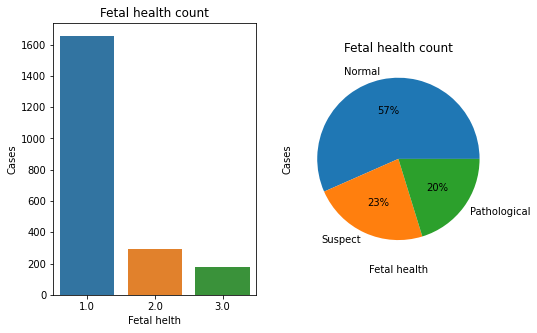

In [ ]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(data["fetal_health"].value_counts())

plt.figure(figsize = (8,5))
plt.subplot(121)
sns.countplot(x="fetal_health", data=data)
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%") 

plt.title("Fetal health count")
plt.xlabel("Fetal health")
plt.ylabel("Cases")


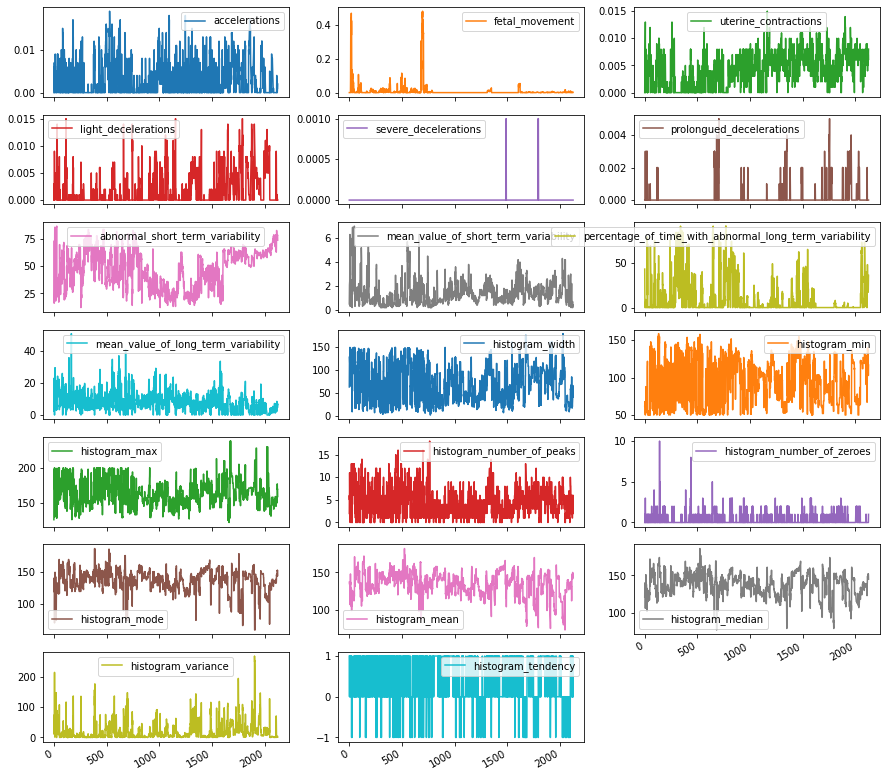

In [ ]:
data.drop(['baseline value', 'fetal_health'], axis=1).plot(subplots=True, layout=(7,3), figsize=(15,15))
plt.show()

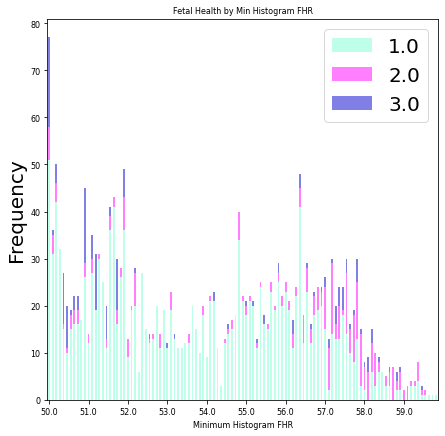

In [ ]:
#Histogram showing the histogram distrubition values of minimum FHR by the Classes
histogram_min = data.groupby(['histogram_min','fetal_health']).histogram_min.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (7,7))
pl.set_xlabel('Minimum Histogram FHR',fontsize=8)
pl.locator_params(axis='x',nbins=10)
pl.legend(fontsize=20)
pl.set_ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=8, rotation=360)
plt.yticks(fontsize=8)
pl.set_title('Fetal Health by Min Histogram FHR',fontsize=8)
plt.show()

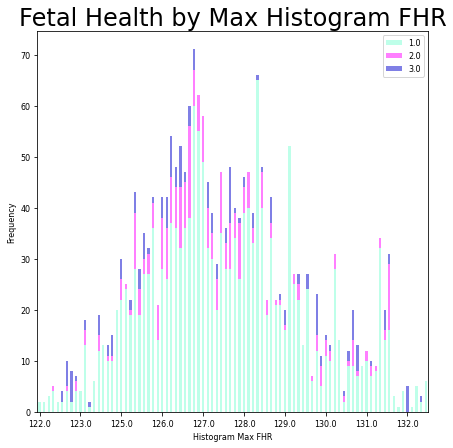

In [ ]:
# #Histogram showing the histogram distribution values of maximum FHR by the Classes
histogram_min = data.groupby(['histogram_max','fetal_health']).histogram_max.count().unstack()
pl = histogram_min.plot(kind = 'bar', stacked =True,
                       color = ['aquamarine','magenta','mediumblue'],
                       alpha = .5, figsize = (7,7))
pl.set_xlabel('Histogram Max FHR', fontsize=8)
pl.locator_params(axis='x',nbins=10)
pl.set_ylabel('Frequency',fontsize=8)
pl.set_title('Fetal Health by Max Histogram FHR',fontsize=24)
plt.xticks(fontsize=8, rotation=360)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.show()

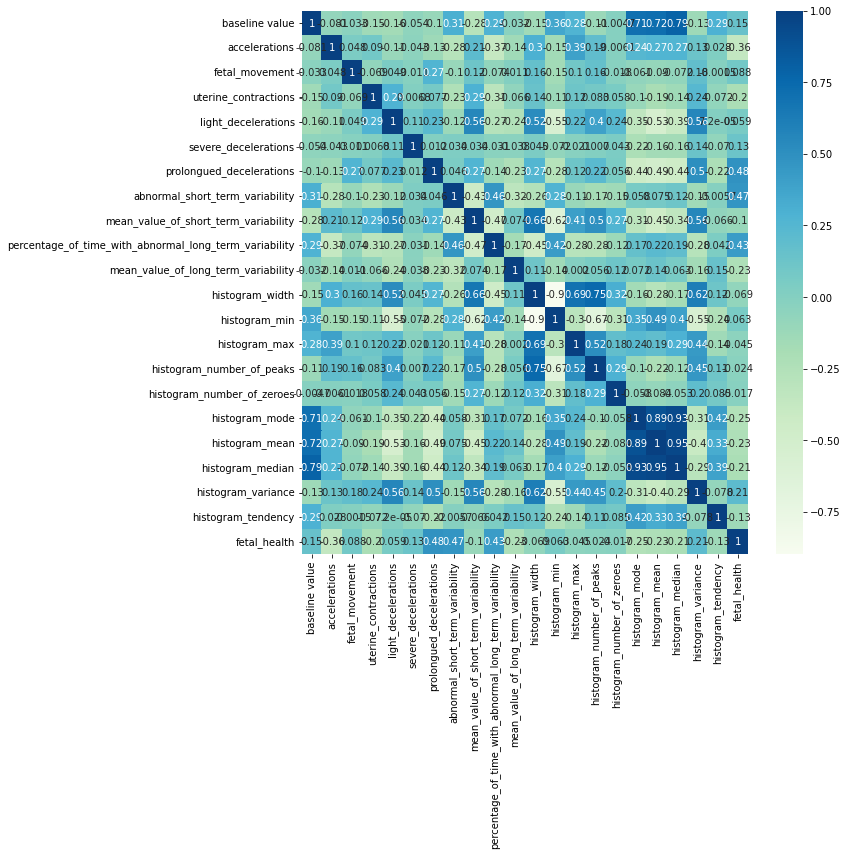

In [ ]:
plt.figure(figsize=(10,10))  
p=sns.heatmap(data.corr(), annot=True, cmap = "GnBu")

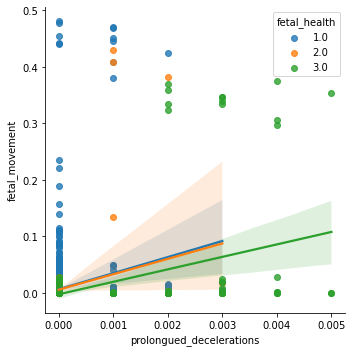

In [ ]:
sns.lmplot(data =data,
           x="prolongued_decelerations",y="fetal_movement",
           hue="fetal_health",legend_out=False)
plt.show() 

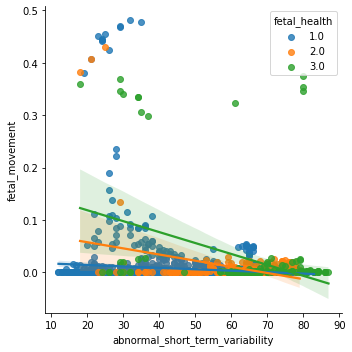

In [ ]:
sns.lmplot(data =data,
           x="abnormal_short_term_variability",y="fetal_movement",
           hue="fetal_health",legend_out=False)
plt.show()

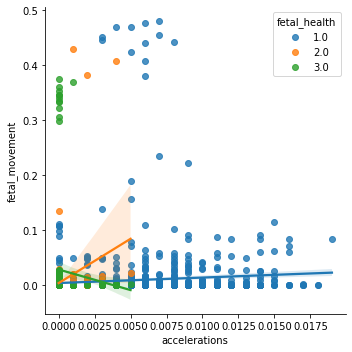

In [ ]:
sns.lmplot(data =data,
           x="accelerations",y="fetal_movement",
            hue="fetal_health",legend_out=False)
plt.show()

In [ ]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
x =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [ ]:
x.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [ ]:
y = data[["fetal_health"]]

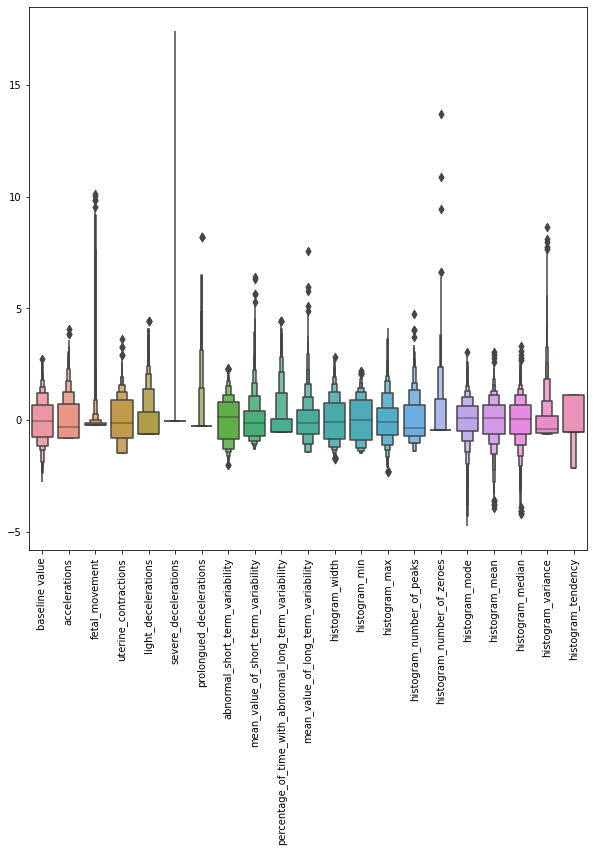

In [ ]:
plt.figure(figsize=(10,10))
sns.boxenplot(data = x)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train,y_train)

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

In [ ]:
def evaluate_model(clf, x_test, y_test, model_name, oversample_type):
    print('--------------------------------------------')
    print('Model ', model_name)
    print('Data Type ', oversample_type)
    y_pred = clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    print(classification_report(y_test, y_pred))
    print("Accuracy ",accuracy)
    print("F1 Score ", f1)
    print("Recall ", recall)
    print("Precision ", precision)
    return [model_name, oversample_type, f1, recall, precision]

In [ ]:
models = {
    'Logistic Regression':LogisticRegression(random_state=10),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier':RandomForestClassifier(random_state=42),
    'Support Vector Machine Classifier':SVC(random_state=0),
    'Naive Bayes Classifier':GaussianNB(),
}

In [ ]:
oversampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
}

In [ ]:
final_output = [] 
for model_k, model_clf in models.items(): 
    for data_type, data in oversampled_data.items(): 
        model_clf.fit(data[0], data[1]) 
        final_output.append(evaluate_model(model_clf, x_test, y_test, model_k, data_type)) 

--------------------------------------------
Model  Logistic Regression
Data Type  ACTUAL
              precision    recall  f1-score   support

         1.0       0.95      0.94      0.94       588
         2.0       0.65      0.63      0.64       108
         3.0       0.68      0.82      0.74        49

    accuracy                           0.88       745
   macro avg       0.76      0.79      0.77       745
weighted avg       0.89      0.88      0.89       745

Accuracy  0.8845637583892617
F1 Score  0.8853066362050661
Recall  0.8845637583892617
Precision  0.8869822152252019
--------------------------------------------
Model  Logistic Regression
Data Type  SMOTE
              precision    recall  f1-score   support

         1.0       0.98      0.86      0.92       588
         2.0       0.54      0.79      0.64       108
         3.0       0.60      0.88      0.71        49

    accuracy                           0.85       745
   macro avg       0.71      0.84      0.76       745

In [ ]:
final_df = pd.DataFrame(final_output, columns=['Model', 'DataType','F1 Score', 'Accuracy','Precision'])

In [ ]:
final_df.sort_values(by="Accuracy", ascending=False)

,Model,DataType,F1 Score,Accuracy,Precision
7,Random Forest Classifier,SMOTE,0.943134,0.942282,0.944668
8,Random Forest Classifier,ADASYN,0.939868,0.938255,0.943032
6,Random Forest Classifier,ACTUAL,0.935539,0.936913,0.935521
3,Decision Tree Classifier,ACTUAL,0.927895,0.927517,0.929154
9,Support Vector Machine Classifier,ACTUAL,0.919124,0.919463,0.919001
5,Decision Tree Classifier,ADASYN,0.910102,0.908725,0.912507
4,Decision Tree Classifier,SMOTE,0.904337,0.904698,0.905165
0,Logistic Regression,ACTUAL,0.885307,0.884564,0.886982
10,Support Vector Machine Classifier,SMOTE,0.873143,0.861745,0.901259
11,Support Vector Machine Classifier,ADASYN,0.866237,0.853691,0.896925


In [ ]:
param_grid = {
  'criterion':['gini', 'entropy'],
  'max_depth': [10, 20, 40, 80, 100],
  'max_features': ['auto', 'sqrt'],
  'n_estimators': [200, 400, 600, 800, 1000, 2000]
}

In [ ]:
rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=2)
rfc_cv.fit(x_train_sm,y_train_sm)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200; total time=   1.0s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=200; total time=   0.9s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400; total time=   1.9s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400; total time=   1.8s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400; total time=   1.8s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400; total time=   1.8s
[CV] END criterion=gini, max_depth=10, max_features=auto, n_estimators=400; total 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 80, 100],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 400, 600, 800, 1000, 2000]},
             verbose=2)

In [ ]:
params = rfc_cv.best_params_
print(params)

{'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
rf = RandomForestClassifier(n_estimators=params['n_estimators'], 
                            criterion=params['criterion'], 
                            max_depth=params['max_depth'], 
                            max_features=params['max_features'])
rf.fit(x_train_sm, y_train_sm)
evaluate_model(rf, x_test, y_test, 'RandomForest', 'SMOTE')

--------------------------------------------
Model  RandomForest
Data Type  SMOTE
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       588
         2.0       0.80      0.81      0.80       108
         3.0       0.87      0.96      0.91        49

    accuracy                           0.94       745
   macro avg       0.88      0.91      0.89       745
weighted avg       0.94      0.94      0.94       745

Accuracy  0.938255033557047
F1 Score  0.938543571597841
Recall  0.938255033557047
Precision  0.9391607050719123


['RandomForest',
 'SMOTE',
 0.938543571597841,
 0.938255033557047,
 0.9391607050719123]